## Initial imports

In [1]:
from scm.plams import *
from ase import Atoms
from ase.visualize.plot import plot_atoms

# Before running AMS jobs, you need to call init()
init()

PLAMS working folder: /home/user/amshome/scripting/scm/plams/doc/source/examples/AMSCalculator/plams_workdir


## Construct a charged ion
Create a charged ion using using `ase.Atoms` and setting the `info` dictionairy.

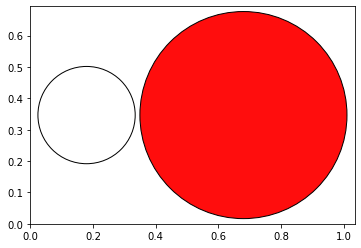

In [2]:
atoms = Atoms('OH',
              positions = [[1.0,0.0,0.0],[0.0,0.0,0.0]]
             )
#define a total charge
atoms.info['charge'] = -1

plot_atoms(atoms, scale=0.5);

## Set the AMS settings

First, set the AMS settings as you normally would do:

In [3]:
settings = Settings()
settings.input.ADF #Use ADF with the default settings
settings.input.ams.Task = "SinglePoint"

## Run AMS

In [4]:
calc = AMSCalculator(settings = settings, name='total_charge')
atoms.calc = calc

atoms.get_potential_energy() #calculate the energy of a charged ion

[22.02|15:13:42] JOB total_charge1 STARTED
[22.02|15:13:42] JOB total_charge1 RUNNING
[22.02|15:13:44] JOB total_charge1 FINISHED
[22.02|15:13:44] JOB total_charge1 SUCCESSFUL


-8.325219526819753

## Construct a charged ion with atomic charges

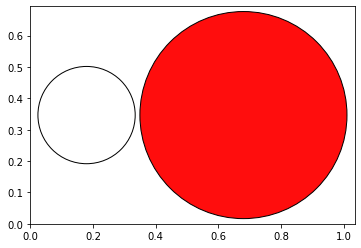

In [5]:
atoms = Atoms('OH',
              positions = [[1.0,0.0,0.0],[0.0,0.0,0.0]],
              charges = [-1, 0]
             )

plot_atoms(atoms, scale=0.5);

## Run AMS 

In [6]:
calc = AMSCalculator(settings = settings, name='atomic_charges')
atoms.calc = calc

atoms.get_potential_energy() #calculate the energy of a charged ion

[22.02|15:13:49] JOB atomic_charges1 STARTED
[22.02|15:13:49] Job atomic_charges1 previously run as total_charge1, using old results
[22.02|15:13:49] JOB atomic_charges1 COPIED


-8.325219526819753

AMS only considers the total charge of the system and not the individual atomic charges. PLAMS thus reuses the results of the previous calculation since the calculation is for the same chemical system. Both input options are allowed. If both input options are used, the total charge is the sum of both.

## Finish PLAMS

In [7]:
finish()

[22.02|15:13:53] PLAMS run finished. Goodbye
